In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [185]:
df=pd.read_csv('test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [186]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [187]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
emb=pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df=pd.concat([df,sex,emb],axis=1)

In [188]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
male             0
Q                0
S                0
dtype: int64

In [189]:
df.drop(['Cabin','Ticket','PassengerId'],axis=1,inplace=True)

In [190]:
def age(x):
    age=x[0]
    cls=x[1]
    
    if pd.isnull(age):
        if cls==1:
            return 38
        elif cls==2:
            return 30
        elif cls==3:
            return 25
    else:
        return age

In [191]:
def name(x):
    name=x[0]
    
    if 'Mr.' in (str(x).split()) :
        return 'Name_Mr'
    elif 'Mrs.' in (str(x).split()):
        return 'Name_Mrs'
    elif 'Miss.' in (str(x).split()):
        return 'Name_Miss'
    elif 'Master.' in (str(x).split()):
        return 'Name_Master'
    else:
        return 'Name_Others'

In [192]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

In [193]:
df['Name']=df[['Name']].apply(name,axis=1)

In [194]:
name=pd.get_dummies(df['Name'],drop_first=True)
df=pd.concat([df,name],axis=1)

In [195]:
df.isnull().sum()

Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
Name_Miss      0
Name_Mr        0
Name_Mrs       0
Name_Others    0
dtype: int64

In [196]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.isnull().sum()

Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
Name_Miss      0
Name_Mr        0
Name_Mrs       0
Name_Others    0
dtype: int64

In [197]:
df.drop('Name',axis=1,inplace=True)

In [198]:
df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name_Miss,Name_Mr,Name_Mrs,Name_Others
0,3,34.5,0,0,7.8292,1,1,0,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1,0,1,0,0
414,1,39.0,0,0,108.9000,0,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,1,0,1,0,1,0,0
416,3,25.0,0,0,8.0500,1,0,1,0,1,0,0


<AxesSubplot:>

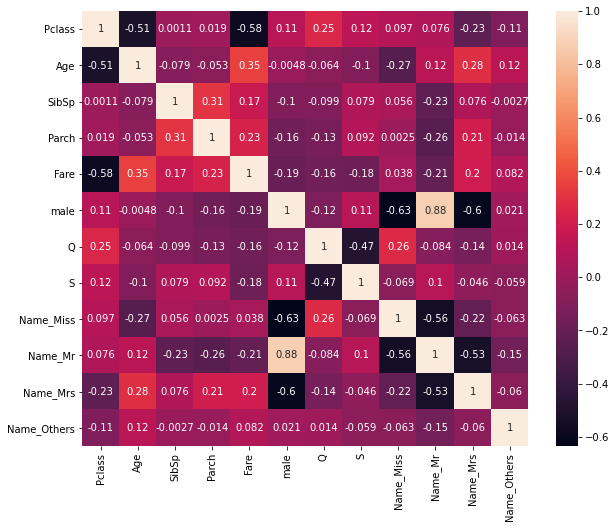

In [199]:
plt.figure(figsize=(10,8))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [200]:

def combine_categorical_vars(data, col1,col2):
    #Get only the required columns from the dataframe
    cols = [col1, col2]
    one_hot_df = data.drop(columns = [col for col in data.columns if col not in cols])
    
    #Get the one hot encodings
    one_hot_df = pd.get_dummies(one_hot_df, columns = one_hot_df.columns)
    
    #Get the unique values mapped to integers
    arr = [int("".join(str(i) for i in List),2) for List in np.array(one_hot_df)] #Convert binary values to int    
    map_dict = {}
    for index, j in enumerate(set(arr)): #Map each int value to index (0,1,..)
        map_dict[j] = index
    
    arr = list(map(lambda x: map_dict[x], arr))
    
    #Get the final labels
    data[col1+'_'+col2] = arr# np.argmax(np.array(one_hot_df), axis =1)
    return data

In [201]:
combine_categorical_vars(df,'Parch','SibSp')
combine_categorical_vars(df,'male','Name_Mr')

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Parch_SibSp,male_Name_Mr
0,3,34.5,0,0,7.8292,1,1,0,0,1,0,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,0,0,1,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,1,0,0,0,1
3,3,27.0,0,0,8.6625,1,0,1,0,1,0,0,0,1
4,3,22.0,1,1,12.2875,0,0,1,0,0,1,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1,0,1,0,0,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,0,0,1,0,0
415,3,38.5,0,0,7.2500,1,0,1,0,1,0,0,0,1
416,3,25.0,0,0,8.0500,1,0,1,0,1,0,0,0,1


In [202]:
df.drop(['SibSp','Parch','Name_Mr','male'],axis=1,inplace=True)
df

,Pclass,Age,Fare,Q,S,Name_Miss,Name_Mrs,Name_Others,Parch_SibSp,male_Name_Mr
0,3,34.5,7.8292,1,0,0,0,0,0,1
1,3,47.0,7.0000,0,1,0,1,0,1,0
2,2,62.0,9.6875,1,0,0,0,0,0,1
3,3,27.0,8.6625,0,1,0,0,0,0,1
4,3,22.0,12.2875,0,1,0,1,0,19,0
...,...,...,...,...,...,...,...,...,...,...
413,3,25.0,8.0500,0,1,0,0,0,0,1
414,1,39.0,108.9000,0,0,0,0,1,0,0
415,3,38.5,7.2500,0,1,0,0,0,0,1
416,3,25.0,8.0500,0,1,0,0,0,0,1


In [203]:
df.to_csv('my_test.csv',index_label=False)